<a href="https://colab.research.google.com/github/Thien24112001/BaiTapAI_Tuan15_19146395/blob/main/cifar100CNN_VoHoangThien_19146395.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import  pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, SGD,Adam
from keras.datasets import cifar100
from random import randint


In [ ]:
(train_imgs,train_labels),(test_imgs,test_labels)=cifar100.load_data()

In [ ]:
laybel =['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

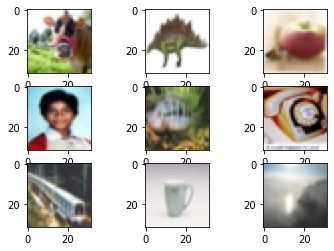

[[19]
 [29]
 [ 0]
 [11]
 [ 1]
 [86]
 [90]
 [28]
 [23]
 [31]]


In [ ]:
for i in range(9):
  plt.subplot(331+i)
  plt.imshow(train_imgs[i])
plt.show()
print(train_labels[0:10])

In [ ]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0
train_labels = np_utils.to_categorical(train_labels,100)
test_labels = np_utils.to_categorical(test_labels,100)

In [ ]:
model = Sequential()
#Lock1
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(128,(3,3),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))
#Lock2
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(64,(3,3),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))
#lock3
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
optimizer = RMSprop(learning_rate=0.0004)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_imgs,train_labels,steps_per_epoch=100,epochs = 100,batch_size=64,validation_data=(test_imgs,test_labels),verbose=1)

Epoch 1/100
100/100 [==============================] - 4s 32ms/step - loss: 2.4684 - accuracy: 0.3745 - val_loss: 2.6649 - val_accuracy: 0.3330
Epoch 2/100
100/100 [==============================] - 3s 30ms/step - loss: 2.3893 - accuracy: 0.3861 - val_loss: 2.6457 - val_accuracy: 0.3343
Epoch 3/100
100/100 [==============================] - 3s 30ms/step - loss: 2.4077 - accuracy: 0.3745 - val_loss: 2.6284 - val_accuracy: 0.3356
Epoch 4/100
100/100 [==============================] - 3s 28ms/step - loss: 2.4469 - accuracy: 0.3677 - val_loss: 2.5912 - val_accuracy: 0.3480
Epoch 5/100
100/100 [==============================] - 3s 28ms/step - loss: 2.4059 - accuracy: 0.3837 - val_loss: 2.6010 - val_accuracy: 0.3428
Epoch 6/100
100/100 [==============================] - 3s 28ms/step - loss: 2.4148 - accuracy: 0.3819 - val_loss: 2.5663 - val_accuracy: 0.3492
Epoch 7/100
100/100 [==============================] - 3s 30ms/step - loss: 2.4093 - accuracy: 0.3766 - val_loss: 2.6421 - val_accuracy:

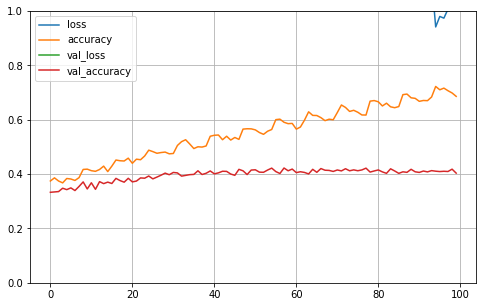

In [ ]:
#Ve do thi
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save('CNN_cifar100.h5')

これは:  apple


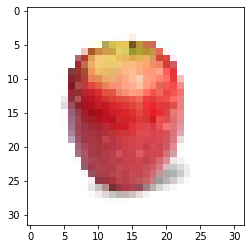

In [ ]:
img = load_img('apple.jpg',target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')
img = img/255
model = load_model('CNN_cifar100.h5')
p = np.argmax(model.predict(img),axis=1)
print('これは: ',laybel[p[0]])
